# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [1]:
import numpy as np
import matplotlib.pyplot as plt

historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
year = data[:,0]
cflux = data[:,1]

#cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

#np.diff(M1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0             # initial mass of carbon in atmosphere in gigatonne (Gt/C)
M2i = 300.0              # initial mass of carbon in land in gigatonne (Gt/C)

k12 = 0.0003              # resident time of carbon mass with respect to land
k21 = 0.1                # resident time of carbon mass with respect to atmo.

ti = 0.0                 # initial time
tf = 20.0                # final time
dt = 0.01                 # time step size

In [3]:
t = np.arange(ti,tf+dt,dt) # array that contains the times form the begining to the end

Nt = t.size                # number of the time steps

print('t has '+str(Nt)+' time steps')   # print out the number of time steps

def boxCarbonModel(Nt,M1i,M2i,k12,k21,dt):

    M1 = np.zeros((Nt,))        # Create an array of zeros for atmo. carbon mass that has length Nt
    M2 = np.zeros((Nt,))        # Create an array of zeros for land carbon mass that has length Nt

    # The foor loop below loops through the number of time steps.

    for i in np.arange(Nt):                      
        if (i==0):            
            # If at the first time step, the initial mass was 0.
            M1[i] = M1i
            M2[i] = M2i

        else:
            # If at a subsequent time step, compute the change of carbon mass in atmosphere and land w.r.t

            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
            # Compute the new mass using the previous and the change of mass
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return M1, M2

t has 2002 time steps


In [4]:
# call of the function boxCarbonModel to compute the carbon mass
M1, M2 = boxCarbonModel(Nt,M1i,M2i,k12,k21,dt)

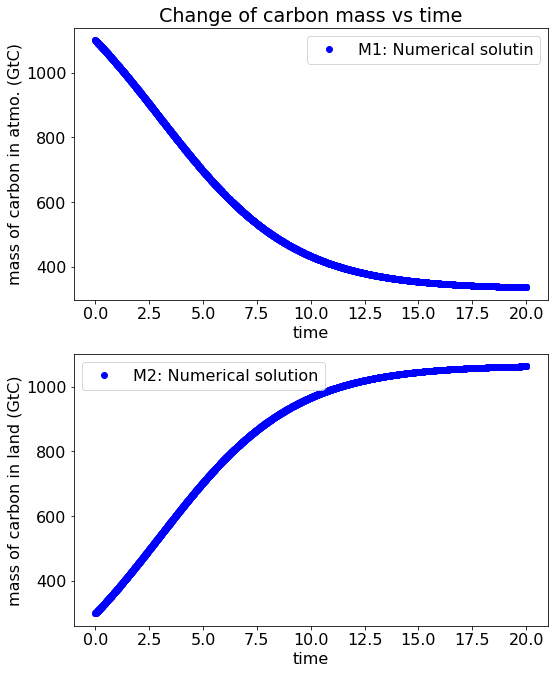

In [5]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('Change of carbon mass vs time')

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='M1: Numerical solutin')
plt.xlabel('time')
plt.ylabel('mass of carbon in atmo. (GtC)')
plt.title('Change of carbon mass vs time')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='M2: Numerical solution')
plt.xlabel('time')
plt.ylabel('mass of carbon in land (GtC)')
plt.legend()
plt.show()

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)

In [6]:
tf = 100
dt = 1/365 

t = np.arange(ti,tf+dt,dt) # array that contains the times form the begining to the end

Nt = t.size                # number of the time steps

# call of the function boxCarbonModel to compute the carbon mass
M1, M2 = boxCarbonModel(Nt,M1i,M2i,k12,k21,dt)

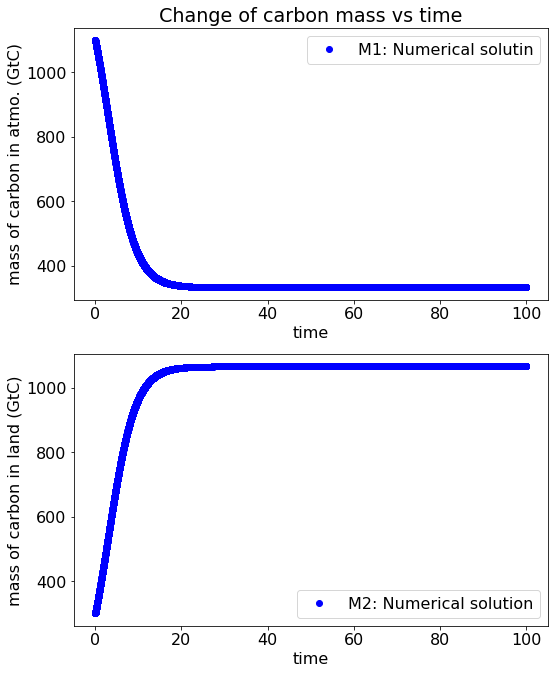

In [7]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('Change of carbon mass vs time')

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='M1: Numerical solutin')
plt.xlabel('time')
plt.ylabel('mass of carbon in atmo. (GtC)')
plt.title('Change of carbon mass vs time')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='M2: Numerical solution')
plt.xlabel('time')
plt.ylabel('mass of carbon in land (GtC)')
plt.legend()
plt.show()

3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

In [8]:
# The value of M1 and M2 at the end of the simulation
print('M1 = ',M1[-1],'GtC\n')
print('M2 = ',M2[-1],'GtC')

M1 =  333.3333333333658 GtC

M2 =  1066.6666666665792 GtC


__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.

In [9]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

#extract the two columns from the historical dataset.
year = data[:,0]
cflux = data[:,1]

2. Plot the anthropogenic emissions data  

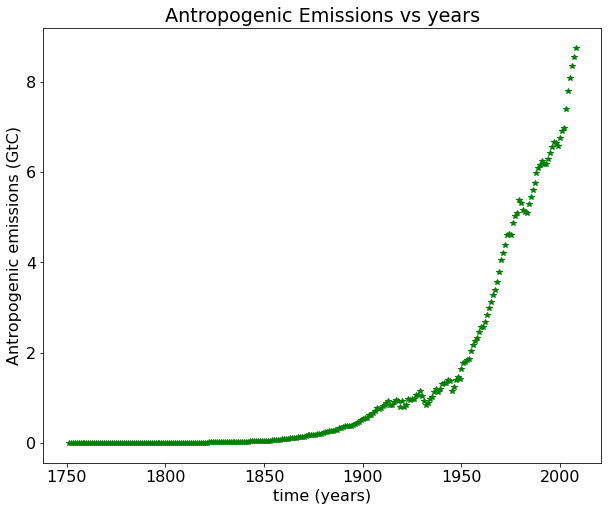

In [10]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})

plt.plot(year,cflux,'g*')

plt.ylabel('Antropogenic emissions (GtC)')
plt.xlabel('time (years)')
plt.title('Antropogenic Emissions vs years')
plt.show()

3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [11]:
def boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,source):
    
    #time loop
    
    M1 = np.zeros((Nt,))        # Create an array of zeros of carbon mass in atmo. that has length Nt
    M2 = np.zeros((Nt,))        # Create an array of zeros of carbon mass in land that has length Nt

    # The foor loop below loops through the number of time steps.

    for i in np.arange(Nt):                      
        if (i==0):            
            # If at the first time step, the initial mass was 0.
            M1[i] = M1i
            M2[i] = M2i

        else:
            # If at a subsequent time step, compute the change of carbon mass in atmosphere and land w.r.t

            dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1] + source[i]
            dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]
            # Compute the new mass using the previous and the change of mass
            M1[i] = M1[i-1] + dM1dt*dt
            M2[i] = M2[i-1] + dM2dt*dt
            
    return M1,M2

In [12]:
cflux = np.interp(t, year, cflux) #interpolate year and cflux values

M1,M2 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux)

 Mass of C in the atmosphere versus time

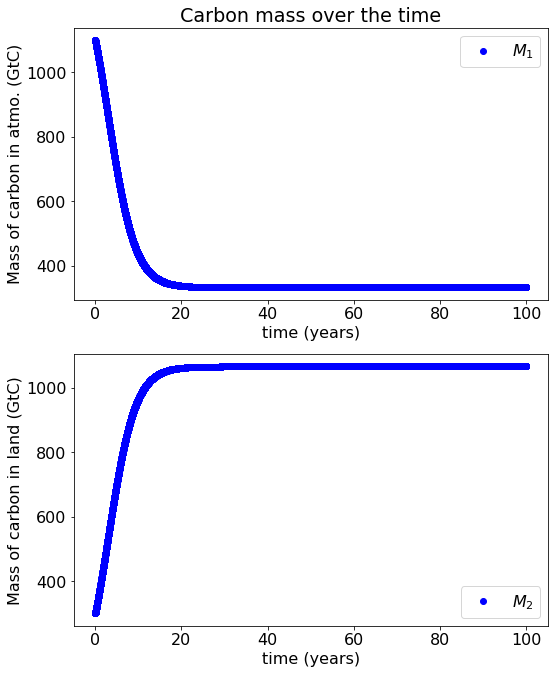

In [13]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='$M_{1}$')
plt.ylabel('Mass of carbon in atmo. (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon mass over the time')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='$M_{2}$')
plt.ylabel('Mass of carbon in land (GtC)')
plt.xlabel('time (years)')
plt.legend()
plt.show()

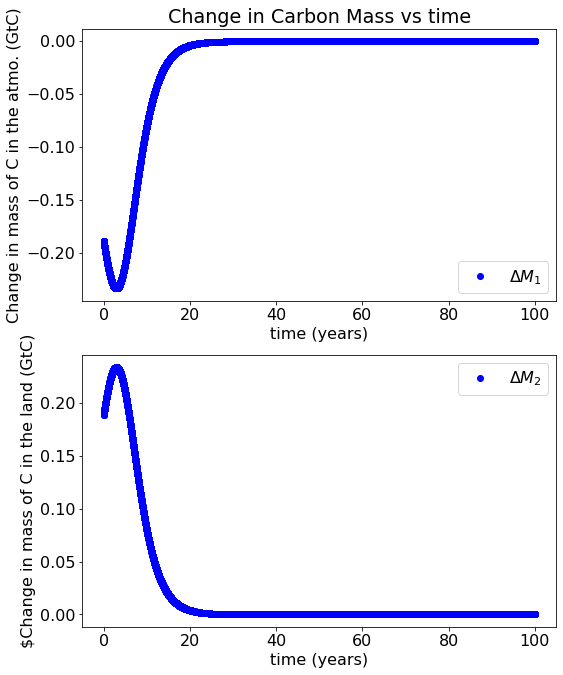

In [14]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.plot(t[:-1],np.diff(M1),'bo', label='$\Delta M_{1}$')
plt.ylabel('Change in mass of C in the atmo. (GtC)')
plt.xlabel('time (years)')
plt.title('Change in Carbon Mass vs time')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t[:-1],np.diff(M2),'bo', label='$\Delta M_{2}$')
plt.ylabel('$Change in mass of C in the land (GtC)')
plt.xlabel('time (years)')
plt.legend()
plt.show()

    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

In [15]:
# The value of M1 and M2 at the end of the simulation
print('M1 = ',M1[-1],'GtC\n')
print('M2 = ',M2[-1],'GtC')

M1 =  333.3427058620549 GtC

M2 =  1066.957294137884 GtC


__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [16]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

In [17]:
cflux1 = np.interp(t, year, cflux_nz2030) #interpolate year and cflux values
cflux2 = np.interp(t, year, cflux_nz2050)
cflux3 = np.interp(t, year, cflux_zeg)

M1_1, M2_1 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux1)
M1_2, M2_2 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux2)
M1_3, M2_3 = boxCarbonModel_source(Nt,M1i,M2i,k12,k21,dt,cflux3)

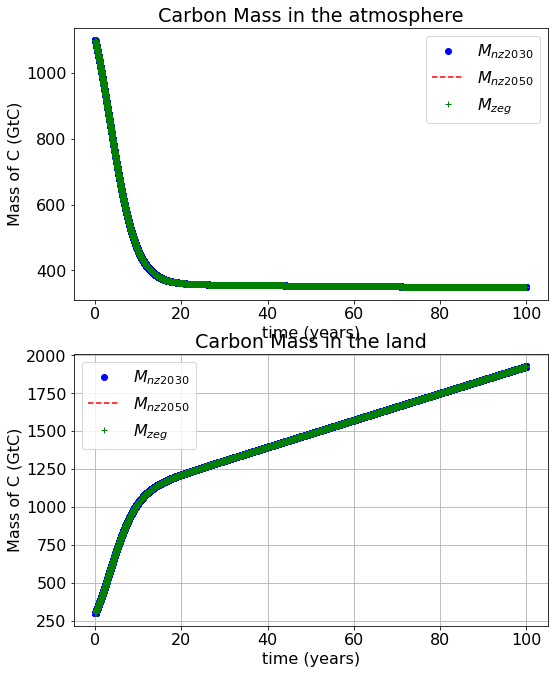

In [18]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.plot(t,M1_1,'bo', label='$M_{nz2030}$')
plt.plot(t,M1_2,'r--', label='$M_{nz2050}$')
plt.plot(t,M1_3,'g+', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the atmosphere')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2_1,'bo', label='$M_{nz2030}$')
plt.plot(t,M2_2,'r--', label='$M_{nz2050}$')
plt.plot(t,M2_3,'g+', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the land')
plt.legend()
plt.grid()

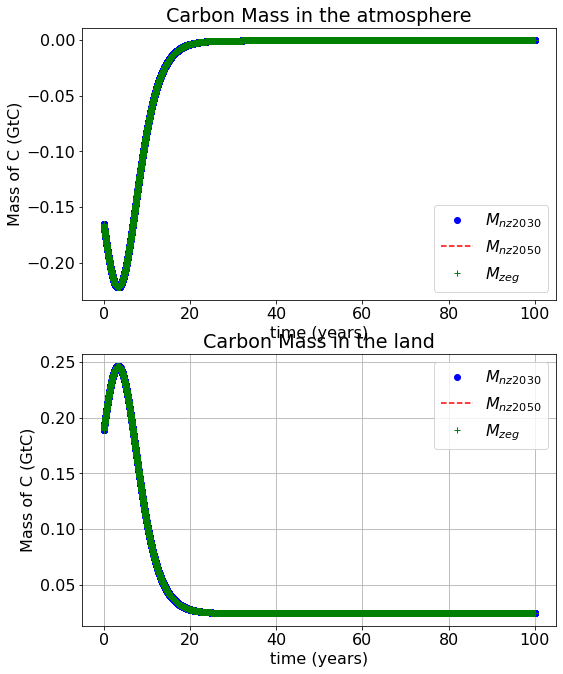

In [19]:
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.plot(t[:-1],np.diff(M1_1),'bo', label='$M_{nz2030}$')
plt.plot(t[:-1],np.diff(M1_2),'r--', label='$M_{nz2050}$')
plt.plot(t[:-1],np.diff(M1_3),'g+', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the atmosphere')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t[:-1],np.diff(M2_1),'bo', label='$M_{nz2030}$')
plt.plot(t[:-1],np.diff(M2_2),'r--', label='$M_{nz2050}$')
plt.plot(t[:-1],np.diff(M2_3),'g+', label='$M_{zeg}$')
plt.ylabel('Mass of C (GtC)')
plt.xlabel('time (years)')
plt.title('Carbon Mass in the land')
plt.legend()
plt.grid()